In [1]:
!python -m pip install -U nilearn

In [1]:
!pip install cupy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached fastrlock-0.8.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl.metadata (9.3 kB)
Using cached fastrlock-0.8.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl (52 kB)
  Created wheel for cupy: filename=cupy-12.3.0-cp38-cp38-linux_x86_64.whl size=96953408 sha256=2140d207ccdae9a51801c03c3cdc54f0e5b9d041f3b60e1c1755fc3e2911996b
  Stored in directory: /home/minyoungxi/.cache/pip/wheels/2e/58/a0/8edaf90eec5a5419570ae5ad52bbd480590878dc58897b3360
Successfully built cupy


# OASIS-3

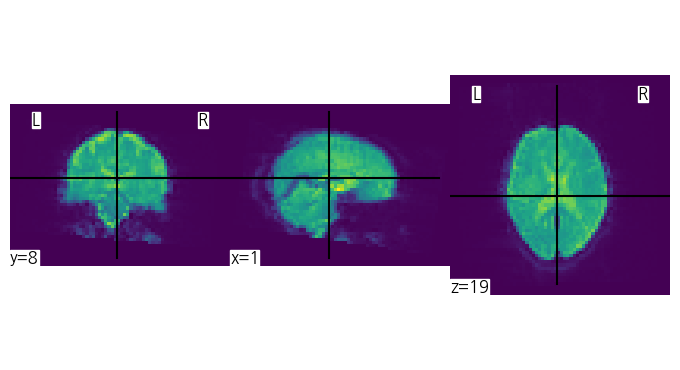

In [1]:
import cupy as cp
import nibabel as nib
from nilearn import image, plotting

img_path = '/home/minyoungxi/MINYOUNGXI/XFL/Suji_20240428_160844_over80_mr_bold_freesurfers/OAS30040_MR_d5108/func1/NIFTI/sub-OAS30040_ses-d5108_task-rest_run-01_bold.nii.gz'
img = image.load_img(img_path)

# 이미지 데이터를 NumPy 배열로 로드
img_data = img.get_fdata()

# NumPy 배열을 CuPy 배열로 변환
img_data_gpu = cp.array(img_data)

# 첫 번째 볼륨(시간 지점) 선택
first_vol_gpu = img_data_gpu[:, :, :, 0]

# CuPy 배열을 NumPy 배열로 변환
first_vol = cp.asnumpy(first_vol_gpu)

# 첫 번째 볼륨을 Nifti1Image로 변환
first_img = image.new_img_like(img, first_vol)

# 이미지 시각화
plotting.plot_img(first_img)
plotting.show()

/tmp/ipykernel_35359/3107340566.py:27: DeprecationWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  cleaned_data = clean(masked_data, detrend=detrend, standardize=standardize,


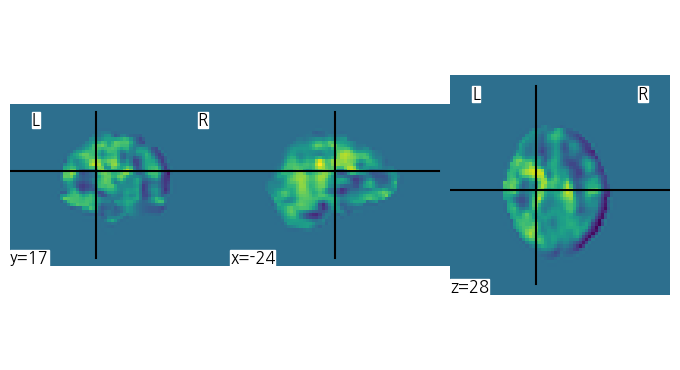

In [5]:
from nilearn import image, plotting, masking
from nilearn.signal import clean

# 데이터 경로
img_path = '/home/minyoungxi/MINYOUNGXI/XFL/Suji_20240428_160844_over80_mr_bold_freesurfers/OAS30040_MR_d5108/func1/NIFTI/sub-OAS30040_ses-d5108_task-rest_run-01_bold.nii.gz'

# 이미지 로드
img = image.load_img(img_path)

# 스무딩: 이미지를 부드럽게 하여 공간적 노이즈를 감소
smoothing_fwhm = 10
smoothed_img = image.smooth_img(img, fwhm=smoothing_fwhm)

# 마스크 계산: 뇌 부분만을 추출
mask_img = masking.compute_epi_mask(smoothed_img)

# 마스킹 적용: 뇌 부분만 남기고 나머지는 제거
masked_data = masking.apply_mask(smoothed_img, mask_img)

# 신호 처리: 표준화, 필터링, 추세 제거
standardize = 'zscore'
detrend = True
low_pass = 0.1
high_pass = 0.01
t_r = 2.0

cleaned_data = clean(masked_data, detrend=detrend, standardize=standardize, 
                     low_pass=low_pass, high_pass=high_pass, t_r=t_r)

# 마스킹된 데이터를 다시 이미지로 변환
cleaned_img = masking.unmask(cleaned_data, mask_img)

# 첫 번째 볼륨을 선택
first_vol = image.index_img(cleaned_img, 0)

# 이미지 시각화
plotting.plot_img(first_vol)
plotting.show()

In [4]:
import nibabel as nib

# 데이터 경로
img_path = '/home/minyoungxi/MINYOUNGXI/XFL/Suji_20240428_160844_over80_mr_bold_freesurfers/OAS30040_MR_d5108/func1/NIFTI/sub-OAS30040_ses-d5108_task-rest_run-01_bold.nii.gz'

# 이미지 로드
img = nib.load(img_path)

# 이미지의 차원 확인
dims = img.shape
print("Dimensions of the image:", dims)

# Voxel 크기 확인 (header 정보에서 얻음)
voxel_size = img.header.get_zooms()
print("Voxel sizes (mm) for each dimension:", voxel_size)

Dimensions of the image: (64, 64, 36, 164)
Voxel sizes (mm) for each dimension: (4.0, 4.0, 3.9999976, 2.2)


# UKB

/tmp/ipykernel_35359/713096831.py:21: DeprecationWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  cleaned_data = clean(masked_data, detrend=detrend, standardize=standardize,


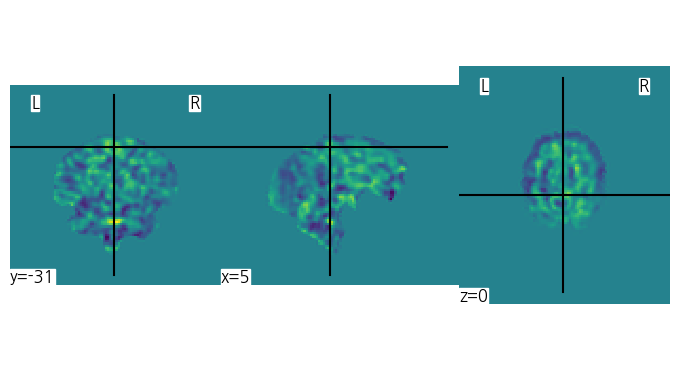

In [7]:
from nilearn import image, plotting, masking
from nilearn.signal import clean

img_path = '/home/minyoungxi/MINYOUNGXI/XFL/UKB_Over_75_resting_functional_MRI/1002051_20227_2_0/fMRI/rfMRI.nii.gz'

img = image.load_img(img_path)

smoothing_fwhm = 6
smoothed_img = image.smooth_img(img, fwhm=smoothing_fwhm)

mask_img = masking.compute_epi_mask(smoothed_img)

masked_data = masking.apply_mask(smoothed_img, mask_img)

standardize = 'zscore'
detrend = True
low_pass = 0.1
high_pass = 0.01
t_r = 2.0

cleaned_data = clean(masked_data, detrend=detrend, standardize=standardize, 
                     low_pass=low_pass, high_pass=high_pass, t_r=t_r)

cleaned_img = masking.unmask(cleaned_data, mask_img)

first_vol = image.index_img(cleaned_img, 0)

plotting.plot_img(first_vol)
plotting.show()

In [8]:
dims = img.shape
print("Dimensions of the image:", dims)

# Voxel 크기 확인 (header 정보에서 얻음)
voxel_size = img.header.get_zooms()
print("Voxel sizes (mm) for each dimension:", voxel_size)

Dimensions of the image: (88, 88, 64, 490)
Voxel sizes (mm) for each dimension: (2.3863637, 2.3863637, 2.4, 0.735)
